In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
folder = 'E:/GZ-DESI/data'

In [50]:
df = pd.read_parquet(f'{folder}/2023-03-15-cats/definitive-merged-interesting-params.parquet', engine = 'pyarrow')

In [51]:
df[:10]

,id_str,merging_none_fraction,merging_minor-disturbance_fraction,merging_major-disturbance_fraction,merging_merger_fraction,category,ra,dec,log_l_ha,log_l_oiii,photo_z,spec_z,redshift,total_sfr_avg,elpetro_mass,logMH,elpetro_mass_log,log_m_bh,log_bolometric_l
0,390393_113,0.378215,0.068470,0.032629,0.520687,merger,315.670729,10.126369,NaN,NaN,0.285089,NaN,0.285089,NaN,NaN,NaN,NaN,NaN,NaN
1,388975_4015,0.109286,0.051234,0.068933,0.770546,merger,315.879343,10.010424,NaN,NaN,0.077537,0.095176,0.095176,-0.00599,2.396471e+09,NaN,9.379573,NaN,NaN
2,388975_4016,0.093990,0.046352,0.065630,0.794028,merger,315.878811,10.011117,NaN,NaN,0.308635,NaN,0.308635,NaN,NaN,NaN,NaN,NaN,NaN
3,388976_4771,0.348186,0.065020,0.034528,0.552266,merger,316.075869,10.014121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,390397_3464,0.305351,0.087567,0.054392,0.552690,merger,316.671962,10.263765,NaN,NaN,0.115421,0.098369,0.098369,-0.51189,2.454621e+10,NaN,10.389985,NaN,NaN
5,388981_4969,0.319470,0.058345,0.032611,0.589573,merger,317.310086,10.072413,NaN,NaN,0.284710,NaN,0.284710,NaN,NaN,NaN,NaN,NaN,NaN
6,388981_4968,0.334056,0.063459,0.031182,0.571303,merger,317.309291,10.072850,NaN,NaN,0.216640,0.229306,0.229306,-0.84744,NaN,NaN,NaN,NaN,NaN
7,391822_6063,0.104836,0.068789,0.254898,0.571477,merger,318.529199,10.605800,NaN,NaN,0.200063,NaN,0.200063,NaN,NaN,NaN,NaN,NaN,NaN
8,391823_717,0.331179,0.080481,0.041284,0.547057,merger,318.679921,10.395046,NaN,NaN,0.287657,NaN,0.287657,NaN,NaN,NaN,NaN,NaN,NaN
9,391823_6736,0.235237,0.148204,0.512880,0.103679,major_interaction,318.737044,10.615450,NaN,NaN,0.258528,NaN,0.258528,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
df_redshift = df[['id_str','category','redshift']]

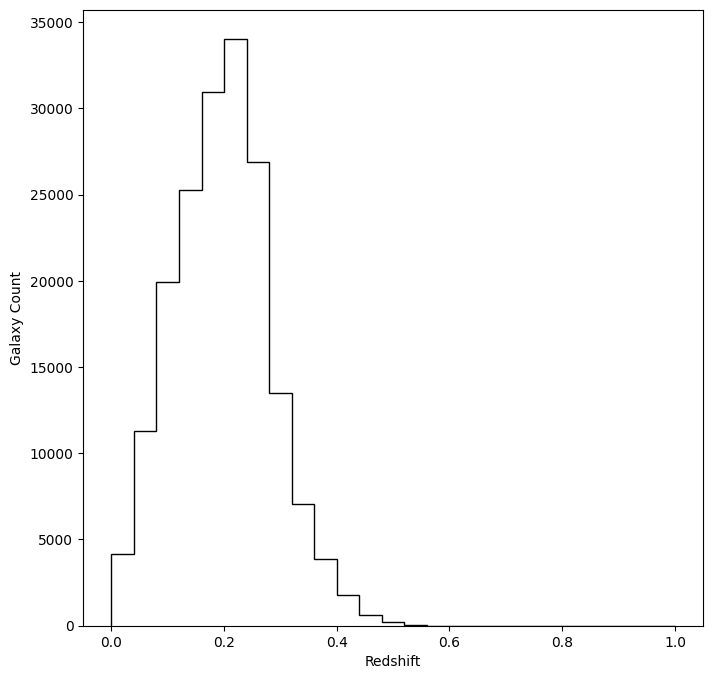

In [54]:
plt.figure(figsize = (8,8))
plt.hist(np.asarray(df_redshift.redshift), bins = 25, color = 'black', histtype = 'step')
plt.xlabel('Redshift')
plt.ylabel('Galaxy Count')
plt.show()

In [55]:
df_redshift.category.value_counts()

merger               185278
major_interaction     11594
minor_interaction       267
Name: category, dtype: int64

Text(0, 0.5, 'Galaxy Count')

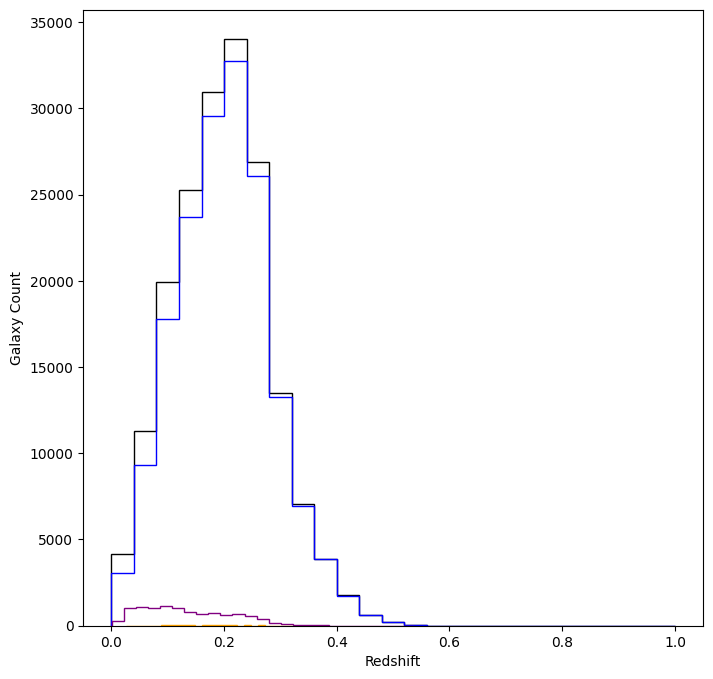

In [56]:
plt.figure(figsize = (8,8))
plt.hist(np.asarray(df_redshift.redshift), bins = 25, color = 'black', histtype = 'step')
plt.hist(np.asarray(df_redshift.query('category == "merger"').redshift), bins = 25, color = 'blue', histtype = 'step')
plt.hist(np.asarray(df_redshift.query('category == "minor_interaction"').redshift), bins = 25, color = 'orange', histtype = 'step')
plt.hist(np.asarray(df_redshift.query('category == "major_interaction"').redshift), bins = 25, color = 'purple', histtype = 'step')
plt.xlabel('Redshift')
plt.ylabel('Galaxy Count')

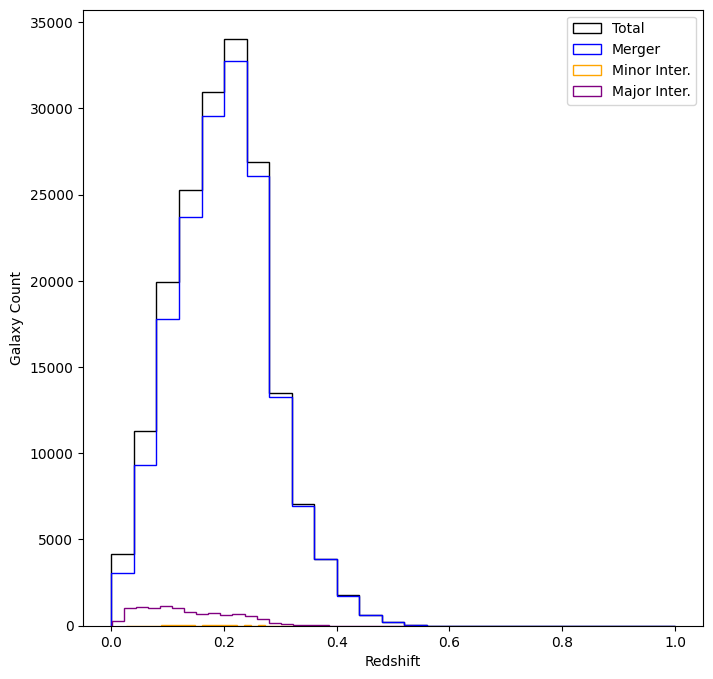

In [57]:
plt.figure(figsize = (8,8))
plt.hist(np.asarray(df_redshift.redshift), bins = 25, color = 'black', histtype = 'step', label = 'Total')
plt.hist(np.asarray(df_redshift.query('category == "merger"').redshift) , bins = 25, color = 'blue', histtype = 'step', label = 'Merger')
plt.hist(np.asarray(df_redshift.query('category == "minor_interaction"').redshift), bins = 25, color = 'orange', histtype = 'step', label = 'Minor Inter.')
plt.hist(np.asarray(df_redshift.query('category == "major_interaction"').redshift), bins = 25, color = 'purple', histtype = 'step', label = 'Major Inter.')
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('Galaxy Count')
plt.show()

In [58]:
weights = np.ones_like(np.asarray(df_redshift.redshift)) / float(len((df_redshift.redshift)))
weights_merg = np.ones_like(np.asarray(df_redshift.query('category == "merger"').redshift)) / float(len((df_redshift.query('category == "merger"').redshift)))
weights_min = np.ones_like(np.asarray(df_redshift.query('category == "minor_interaction"').redshift)) / float(len((df_redshift.query('category == "minor_interaction"').redshift)))
weights_maj = np.ones_like(np.asarray(df_redshift.query('category == "major_interaction"').redshift)) / float(len((df_redshift.query('category == "major_interaction"').redshift)))

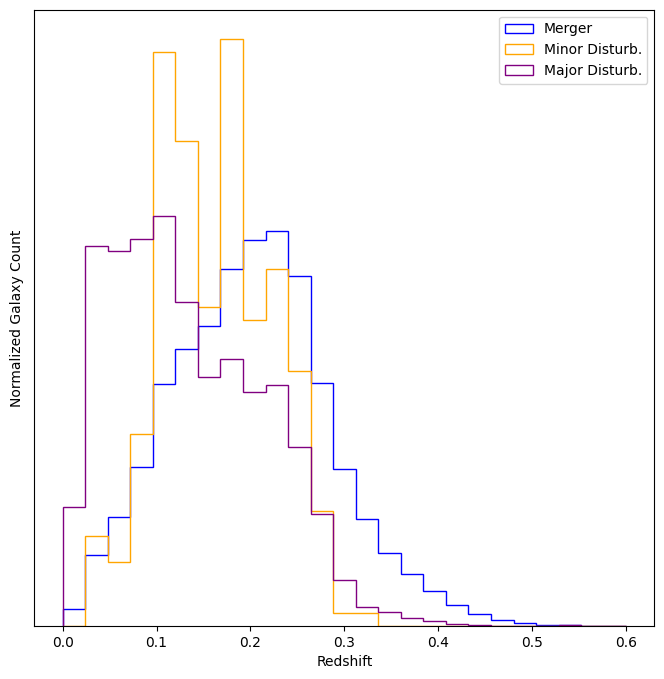

In [59]:
plt.figure(figsize = (8,8))
x = 0
x2 = 0.6
# plt.hist(np.asarray(df_redshift.redshift), bins = 25, color = 'black', histtype = 'step', label = 'Total', density = True, range=(x, x2))
plt.hist(np.asarray(df_redshift.query('category == "merger"').redshift) , bins = 25, color = 'blue', histtype = 'step', label = 'Merger', density = True, range=(x, x2))
plt.hist(np.asarray(df_redshift.query('category == "minor_interaction"').redshift), bins = 25, color = 'orange', histtype = 'step', label = 'Minor Disturb.', density = True, range=(x, x2))
plt.hist(np.asarray(df_redshift.query('category == "major_interaction"').redshift), bins = 25, color = 'purple', histtype = 'step', label = 'Major Disturb.', density = True, range=(x, x2))
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('Normalized Galaxy Count')
plt.yticks([])
plt.show()